<h1> Importing necessary Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

<h1> Importing Natural Language Toolkit and downloading 'STOPWORDS' that can be a,or , the and so on

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h1> importing and reading the csv data set sample from Kaggle

In [ ]:
data = pd.read_csv('/content/walmart_electronics_products_reviews_dataset_sample.csv')
data.head()

,id,url,name,sku,price,currency,primary_category,reviewer_name,review_title,description,rating,published_at,scraped_at
0,547476480,https://www.walmart.com/ip/TCL-28D2700-Stand-L...,TCL 28D2700 Stand Legs W/Screws - USED(68-32D2...,547476480,19.95,USD,Electronics,Eric,NaN,The legs wasn't the right ones for my tv but i...,3,2022-08-17 00:00:00,2023-07-14 15:34:18
1,547476480,https://www.walmart.com/ip/TCL-28D2700-Stand-L...,TCL 28D2700 Stand Legs W/Screws - USED(68-32D2...,547476480,19.95,USD,Electronics,Selina,NaN,This doesn't fit my tv that i ordered it to fi...,1,2022-07-10 00:00:00,2023-07-14 15:34:18
2,547476480,https://www.walmart.com/ip/TCL-28D2700-Stand-L...,TCL 28D2700 Stand Legs W/Screws - USED(68-32D2...,547476480,19.95,USD,Electronics,Susan,NaN,NaN,5,2023-05-18 00:00:00,2023-07-14 15:34:18
3,151102224,https://www.walmart.com/ip/Restored-Apple-iPad...,"Restored Apple iPad 2 16GB 9.7"" Touchscreen Wi...",151102224,52.99,USD,Electronics,coyote75,my i pad,i love it . i already have an i pod and...,5,2016-10-13 00:00:00,2023-07-14 15:34:18
4,151102224,https://www.walmart.com/ip/Restored-Apple-iPad...,"Restored Apple iPad 2 16GB 9.7"" Touchscreen Wi...",151102224,52.99,USD,Electronics,MGutierrez,"Good iPad for Age, Great Price, Bad Charger",I ordered two iPads for my sons to play with. ...,5,2021-07-22 00:00:00,2023-07-14 15:34:18


<h1> Finding the unique Ratings Avaialble

In [ ]:
pd.unique(data['rating'])

array([3, 1, 5, 2, 4])

<h1> Printing the rating and the index so that the data loop is running around all 200 elements)

In [ ]:
print(data.rating)
print(data.index)

0      3
1      1
2      5
3      5
4      5
      ..
194    5
195    5
196    5
197    5
198    5
Name: rating, Length: 199, dtype: int64
RangeIndex(start=0, stop=199, step=1)


<Axes: xlabel='rating', ylabel='count'>

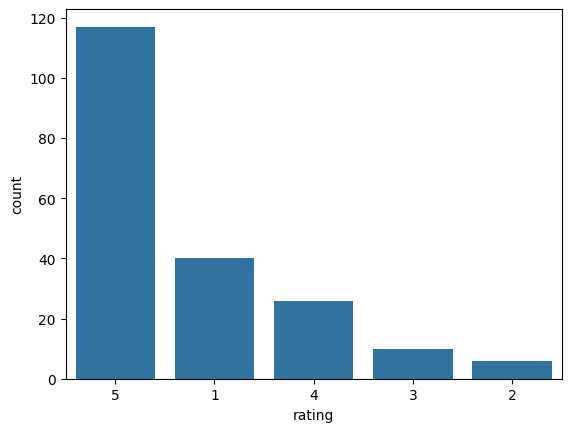

In [ ]:
#plotting the graph wrt to rating and count
sns.countplot(data=data,
              x='rating',
              order=data.rating.value_counts().index)

In [ ]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg
print (pos_neg)

[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]


In [ ]:
import nltk
import re
from tqdm import tqdm
from nltk.corpus import stopwords
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        if not isinstance(sentence, str):  # Check if the sentence is a string
            sentence = ""  # If it's not a string, set it as an empty string

        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(
            token.lower()
            for token in nltk.word_tokenize(sentence)
            if token.lower() not in stopwords.words('english')
        ))

    return preprocessed_text

# Assuming 'description' is the actual column name in your DataFrame
# Fill NaN values with empty strings or drop rows with missing 'description' if preferred
data['description'] = data['description'].fillna('')

preprocessed_review = preprocess_text(data['description'].values)
data['review'] = preprocessed_review


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 199/199 [00:01<00:00, 156.90it/s]


In [ ]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

100%|██████████| 199/199 [00:00<00:00, 269.12it/s]


In [ ]:
data.head()

,id,url,name,sku,price,currency,primary_category,reviewer_name,review_title,description,rating,published_at,scraped_at,label,review
0,547476480,https://www.walmart.com/ip/TCL-28D2700-Stand-L...,TCL 28D2700 Stand Legs W/Screws - USED(68-32D2...,547476480,19.95,USD,Electronics,Eric,NaN,The legs wasn't the right ones for my tv but i...,3,2022-08-17 00:00:00,2023-07-14 15:34:18,0,legs wasnt right ones tv made work
1,547476480,https://www.walmart.com/ip/TCL-28D2700-Stand-L...,TCL 28D2700 Stand Legs W/Screws - USED(68-32D2...,547476480,19.95,USD,Electronics,Selina,NaN,This doesn't fit my tv that i ordered it to fi...,1,2022-07-10 00:00:00,2023-07-14 15:34:18,0,doesnt fit tv ordered fit useless
2,547476480,https://www.walmart.com/ip/TCL-28D2700-Stand-L...,TCL 28D2700 Stand Legs W/Screws - USED(68-32D2...,547476480,19.95,USD,Electronics,Susan,NaN,,5,2023-05-18 00:00:00,2023-07-14 15:34:18,1,
3,151102224,https://www.walmart.com/ip/Restored-Apple-iPad...,"Restored Apple iPad 2 16GB 9.7"" Touchscreen Wi...",151102224,52.99,USD,Electronics,coyote75,my i pad,i love it . i already have an i pod and...,5,2016-10-13 00:00:00,2023-07-14 15:34:18,1,love already pod phone made easier work
4,151102224,https://www.walmart.com/ip/Restored-Apple-iPad...,"Restored Apple iPad 2 16GB 9.7"" Touchscreen Wi...",151102224,52.99,USD,Electronics,MGutierrez,"Good iPad for Age, Great Price, Bad Charger",I ordered two iPads for my sons to play with. ...,5,2021-07-22 00:00:00,2023-07-14 15:34:18,1,ordered two ipads sons play much older ipads m...


In [ ]:
data["label"].value_counts()

,count
label,
1,117
0,82


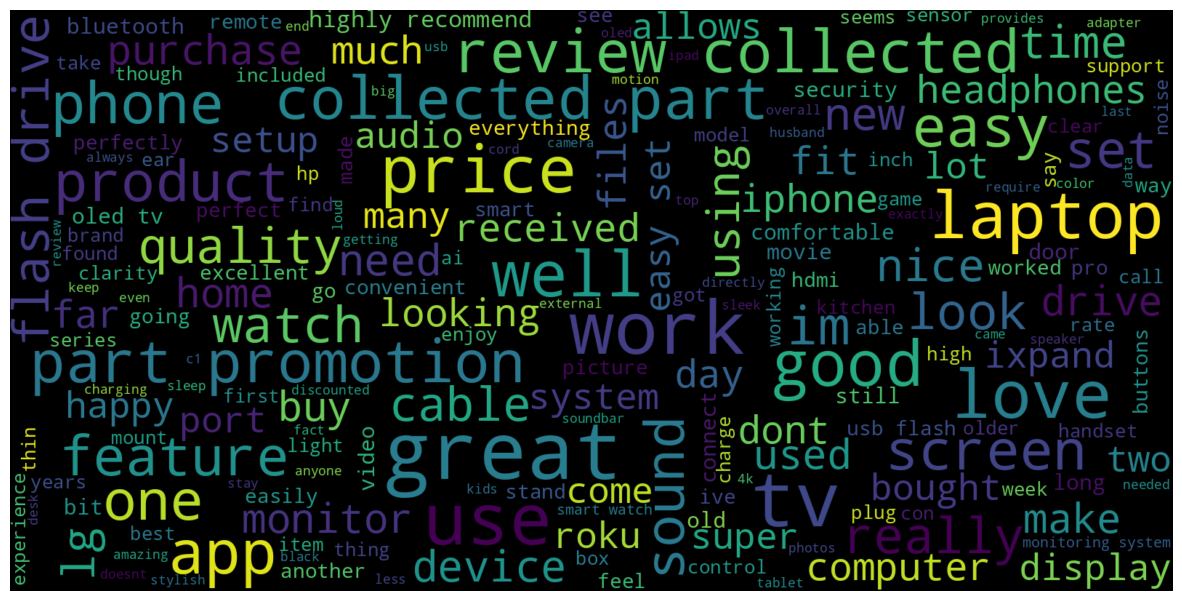

In [ ]:
consolidated = ' '.join(
    word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9699248120300752


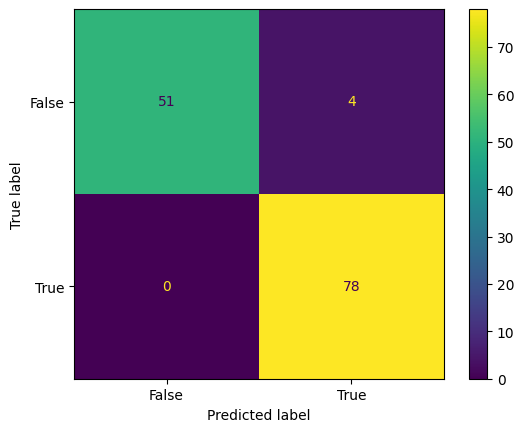

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

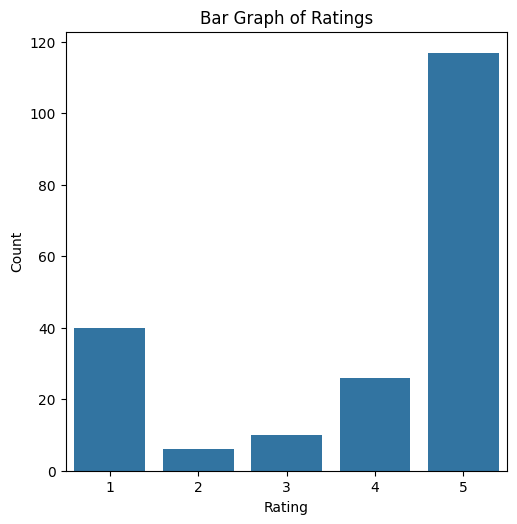

In [ ]:
# demonstrating bar graph w.r.t Rating and Count

plt.figure(figsize=(5.7, 5.7))
sns.countplot(x='rating', data=data)
plt.title('Bar Graph of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

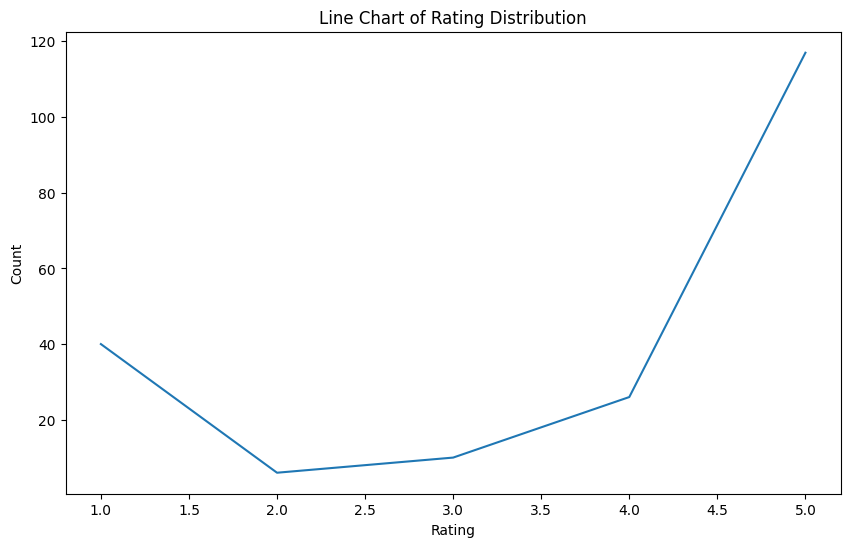

In [ ]:
#Line chart of Rating Distribution with Rating and count
plt.figure(figsize=(10, 6))
plt.plot(data['rating'].value_counts().sort_index().index, data['rating'].value_counts().sort_index().values)
plt.title('Line Chart of Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

the avaialable data columns are ----->
 Index(['id', 'url', 'name', 'sku', 'price', 'currency', 'primary_category',
       'reviewer_name', 'review_title', 'description', 'rating',
       'published_at', 'scraped_at', 'label', 'review', 'date'],
      dtype='object')


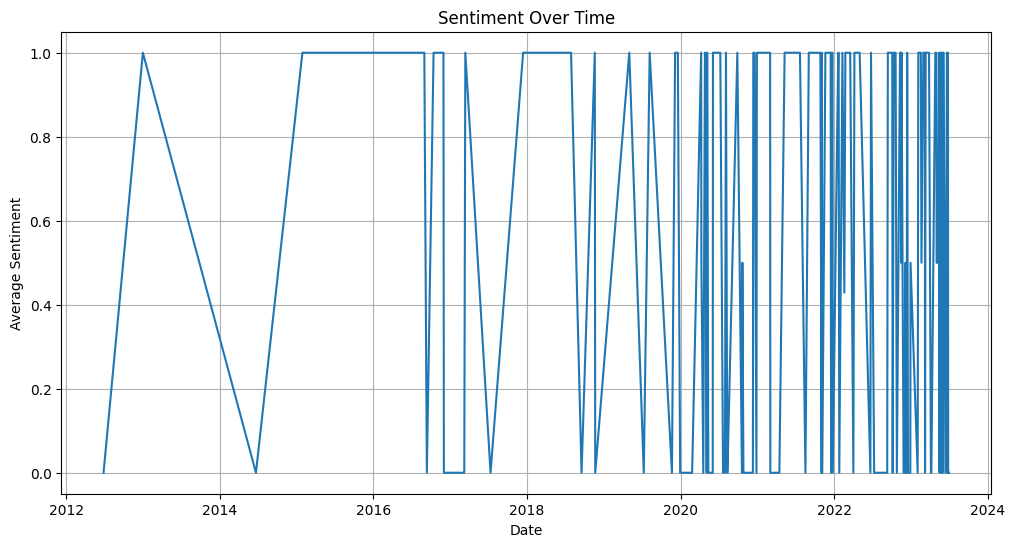

In [ ]:
# analyze sentiment over time
#print the available columns
print("the avaialable data columns are ----->\n",data.columns)
# Convert the 'date' column to published_at objects if it's not already
data['date'] = pd.to_datetime(data['published_at'])

# Group data by date and calculate average sentiment for each date
sentiment_over_time = data.groupby('date')['label'].mean()

# Plot the sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Over Time')
plt.grid(True)
plt.show()

In [ ]:
# Assuming  data has a 'date' column representing the time of the review
# and you want to analyze sentiment over time
# Convert the 'date' column to datetime objects if it's not already
data['date'] = pd.to_datetime(data['published_at'])
date=data['date']

# Group data by date and calculate average sentiment for each date
sentiment_over_time = data.groupby('date')['label'].mean()
print(date)
print("-----------------")
print(sentiment_over_time)


0     2022-08-17
1     2022-07-10
2     2023-05-18
3     2016-10-13
4     2021-07-22
         ...    
194   2023-03-08
195   2021-10-27
196   2021-10-27
197   2021-10-25
198   2021-07-14
Name: date, Length: 199, dtype: datetime64[ns]
-----------------
date
2012-06-26    0.0
2012-12-30    1.0
2014-06-21    0.0
2015-01-28    1.0
2016-08-30    1.0
             ... 
2023-06-21    1.0
2023-06-24    0.0
2023-06-26    1.0
2023-06-27    0.0
2023-07-01    0.0
Name: label, Length: 175, dtype: float64


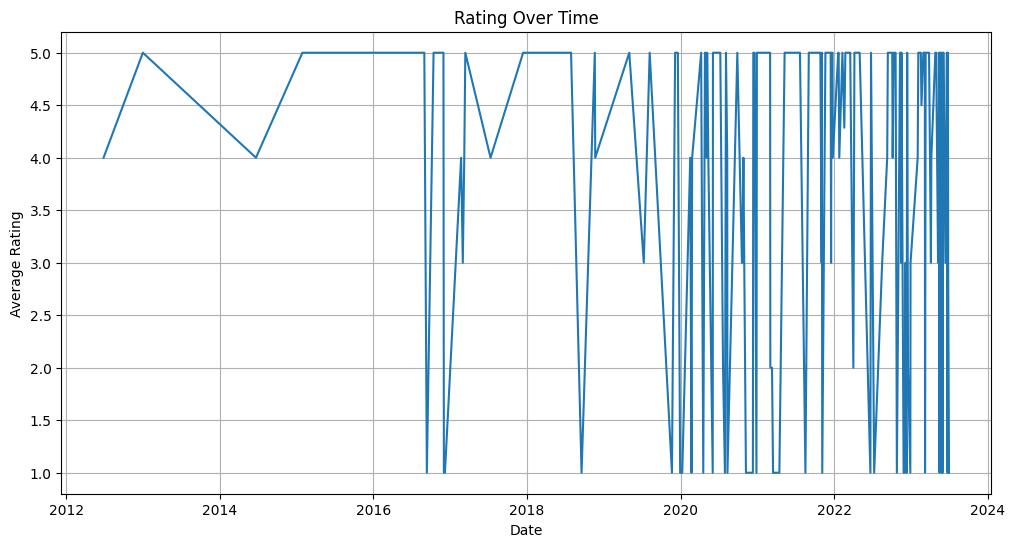

In [ ]:
# graph for date vs rating
# Assuming data has a 'rating' column

# Group data by date and calculate average rating for each date
rating_over_time = data.groupby('date')['rating'].mean()

# Plot the rating over time
plt.figure(figsize=(12, 6))
plt.plot(rating_over_time.index, rating_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Rating Over Time')
plt.grid(True)
plt.show()

In [ ]:
# Assuming your data has a 'date' column representing the time of the review
# and you want to analyze rating over time

# Convert the 'date' column to datetime objects if it's not already
data['date'] = pd.to_datetime(data['published_at'])

# Create a dropdown widget for selecting the year
year_dropdown = widgets.Dropdown(
    options=sorted(data['date'].dt.year.unique()),
    value=data['date'].dt.year.min(),  # Default to the earliest year
    description='Year:'
)

# Create an output widget to display the plot
output = widgets.Output()

# Define a function to update the plot based on the selected year
def update_plot(change):
    selected_year = change.new
    with output:
        clear_output(wait=True)
        # Filter data for the selected year
        year_data = data[data['date'].dt.year == selected_year]

        # Group data by date and calculate average rating for each date
        rating_over_time = year_data.groupby('date')['rating'].mean()

        # Plot the rating over time
        plt.figure(figsize=(12, 6))
        plt.plot(rating_over_time.index, rating_over_time.values)
        plt.xlabel('Date')
        plt.ylabel('Average Rating')
        plt.title(f'Rating Over Time ({selected_year})')
        plt.grid(True)
        plt.show()


# Observe the dropdown widget for changes
year_dropdown.observe(update_plot, names='value')

# Display the dropdown and the output widget
display(year_dropdown, output)

Dropdown(description='Year:', options=(2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023), valu…

Output()